### Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.



### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 

### Dataset for train and test

In [2]:
original = pd.read_csv('train.csv')
original.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data = pd.read_csv('train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data = pd.read_csv('train.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_data.shape

(1460, 81)

### Exploratory data analysis

First, I'm going to analyze what my dataset is like, what type the columns are, if there are empty fields ... etc.

In [6]:
train_data.shape

(1460, 81)

We can see that there are 80 fields to predict my goal (SalePrice). To carry out my predictive models I have to reduce the number of predictor variables.

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

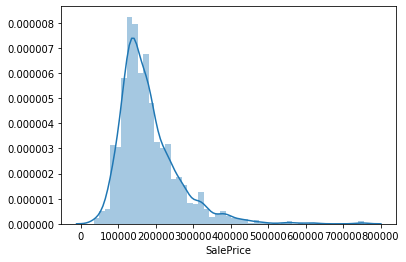

In [86]:
sns.distplot(train_data['SalePrice']);

#### Mising values

In [9]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [10]:
def detect_values_null(data):
    columns=data.columns.values
    
    for feature in columns:
        
        if(pd.isnull(data[feature]).values.ravel().sum()>0):
            print("The column '",feature,"' has ",pd.isnull(data[feature]).values.ravel().sum()," null values. Type: ",data[feature].dtype)

In [11]:
detect_values_null(train_data)

The column ' LotFrontage ' has  259  null values. Type:  float64
The column ' Alley ' has  1369  null values. Type:  object
The column ' MasVnrType ' has  8  null values. Type:  object
The column ' MasVnrArea ' has  8  null values. Type:  float64
The column ' BsmtQual ' has  37  null values. Type:  object
The column ' BsmtCond ' has  37  null values. Type:  object
The column ' BsmtExposure ' has  38  null values. Type:  object
The column ' BsmtFinType1 ' has  37  null values. Type:  object
The column ' BsmtFinType2 ' has  38  null values. Type:  object
The column ' Electrical ' has  1  null values. Type:  object
The column ' FireplaceQu ' has  690  null values. Type:  object
The column ' GarageType ' has  81  null values. Type:  object
The column ' GarageYrBlt ' has  81  null values. Type:  float64
The column ' GarageFinish ' has  81  null values. Type:  object
The column ' GarageQual ' has  81  null values. Type:  object
The column ' GarageCond ' has  81  null values. Type:  object
Th

In [12]:
detect_values_null(test_data)

The column ' LotFrontage ' has  259  null values. Type:  float64
The column ' Alley ' has  1369  null values. Type:  object
The column ' MasVnrType ' has  8  null values. Type:  object
The column ' MasVnrArea ' has  8  null values. Type:  float64
The column ' BsmtQual ' has  37  null values. Type:  object
The column ' BsmtCond ' has  37  null values. Type:  object
The column ' BsmtExposure ' has  38  null values. Type:  object
The column ' BsmtFinType1 ' has  37  null values. Type:  object
The column ' BsmtFinType2 ' has  38  null values. Type:  object
The column ' Electrical ' has  1  null values. Type:  object
The column ' FireplaceQu ' has  690  null values. Type:  object
The column ' GarageType ' has  81  null values. Type:  object
The column ' GarageYrBlt ' has  81  null values. Type:  float64
The column ' GarageFinish ' has  81  null values. Type:  object
The column ' GarageQual ' has  81  null values. Type:  object
The column ' GarageCond ' has  81  null values. Type:  object
Th

There are columns in the dataset that have null values. I am going to distinguish between columns of numeric type and columns of type string. I will not modify the columns of type string. 

The empty values of the numerical type columns I am going to fill with the values of the mean of the values of the entire column. This is so that it does not affect the prediction.


In [13]:
def fill_mean_numeric_column(data):
    num=0
    columns=data.columns.values
    for feature in columns:
        if(pd.isnull(data[feature]).values.ravel().sum()>0 and (data[feature].dtype=='float64' or data[feature].dtype=='int64')):
            data[feature]=data[feature].fillna(data[feature].mean())
            num=num+1
            print("Number of variables changed: ",num)


In [14]:
fill_mean_numeric_column(train_data)

Number of variables changed:  1
Number of variables changed:  2
Number of variables changed:  3


In [15]:
fill_mean_numeric_column(test_data)

Number of variables changed:  1
Number of variables changed:  2
Number of variables changed:  3


I'm going to rename it to NA the fill values. Some columns are very unbalanced, therefore when I use the most important variables for the prediction it will not take them into account because these variables will not offer important information for the prediction.

In [16]:
def fill_na_string_columns(data):
    
    columns=data.columns.values
    
    for feature in columns:
        
        if(pd.isnull(data[feature]).values.ravel().sum()>0 and data[feature].dtype=='O'):
            data[feature]=data[feature].fillna("NA")
            print("The column '",feature,"' has ",pd.isnull(data[feature]).values.ravel().sum()," null values. Type: ",data[feature].dtype)

In [17]:
fill_na_string_columns(train_data)

The column ' Alley ' has  0  null values. Type:  object
The column ' MasVnrType ' has  0  null values. Type:  object
The column ' BsmtQual ' has  0  null values. Type:  object
The column ' BsmtCond ' has  0  null values. Type:  object
The column ' BsmtExposure ' has  0  null values. Type:  object
The column ' BsmtFinType1 ' has  0  null values. Type:  object
The column ' BsmtFinType2 ' has  0  null values. Type:  object
The column ' Electrical ' has  0  null values. Type:  object
The column ' FireplaceQu ' has  0  null values. Type:  object
The column ' GarageType ' has  0  null values. Type:  object
The column ' GarageFinish ' has  0  null values. Type:  object
The column ' GarageQual ' has  0  null values. Type:  object
The column ' GarageCond ' has  0  null values. Type:  object
The column ' PoolQC ' has  0  null values. Type:  object
The column ' Fence ' has  0  null values. Type:  object
The column ' MiscFeature ' has  0  null values. Type:  object


In [18]:
fill_na_string_columns(test_data)

The column ' Alley ' has  0  null values. Type:  object
The column ' MasVnrType ' has  0  null values. Type:  object
The column ' BsmtQual ' has  0  null values. Type:  object
The column ' BsmtCond ' has  0  null values. Type:  object
The column ' BsmtExposure ' has  0  null values. Type:  object
The column ' BsmtFinType1 ' has  0  null values. Type:  object
The column ' BsmtFinType2 ' has  0  null values. Type:  object
The column ' Electrical ' has  0  null values. Type:  object
The column ' FireplaceQu ' has  0  null values. Type:  object
The column ' GarageType ' has  0  null values. Type:  object
The column ' GarageFinish ' has  0  null values. Type:  object
The column ' GarageQual ' has  0  null values. Type:  object
The column ' GarageCond ' has  0  null values. Type:  object
The column ' PoolQC ' has  0  null values. Type:  object
The column ' Fence ' has  0  null values. Type:  object
The column ' MiscFeature ' has  0  null values. Type:  object


Now all the dataset fields are filled. 

### Prepare the dataset for predictive models

In order not to create dummy variables and have 200 columns, I am going to give numbers from 0 to X to each value of the string columns.
    To know which columns I have to change, I have to check the description of the data set.

In [19]:
def create_categories(data):
    
    columns=data.columns.values
    
    num_variables=0
    
    for feature in columns:
        
        if(data[feature].dtype=='O'):

            column=data[feature].unique()
            
            num_variables
            num=0
            for i in column: 

                data.loc[data[feature]==i,feature]=num
                num+=1
                
            num_variables+=1
            
    return ("Number of variables changed: " + str(num_variables))

In [20]:
create_categories(train_data)

'Number of variables changed: 43'

In [21]:
create_categories(test_data)

'Number of variables changed: 43'

In [22]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,0,1,0,0,...,0,0,0,0,0,2,2006,0,1,140000
4,5,60,0,84.0,14260,0,0,1,0,0,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,62.0,7917,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,1457,20,0,85.0,13175,0,0,0,0,0,...,0,0,1,0,0,2,2010,0,0,210000
1457,1458,70,0,66.0,9042,0,0,0,0,0,...,0,0,3,1,2500,5,2010,0,0,266500
1458,1459,20,0,68.0,9717,0,0,0,0,0,...,0,0,0,0,0,4,2010,0,0,142125


In [23]:
original

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Select the most important variables to predict

In this case I am going to select the most important variables by two methods.
* 1 - The first method is to do it manually with the Pearson method.
* 2 - The second is using tools from the sklearn library
* 3 - Use all the predictor variables

#### 1 - The first method is to do it manually with the Pearson method.


* I check the correlation between the variable to be predicted and the predictor variables. I choose the predictor variables with the highest correlation with the variable to be predicted (SalePrice)

* I check the correlation between the predictor variables and discard the highly correlated variables.

In [24]:
cor = train_data.corr () 

In [1]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = cor.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=3)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

NameError: name 'cor' is not defined

In [25]:
#Correlation with the output variable

cor_target = abs (cor ["SalePrice"]) 

#Select highly correlated features

relevantes_características = cor_target [cor_target> 0.35] 
relevantes_características

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
Foundation      0.429678
BsmtFinType1    0.370971
BsmtFinSF1      0.386420
TotalBsmtSF     0.613581
HeatingQC       0.427649
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
FireplaceQu     0.402854
GarageYrBlt     0.470177
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [26]:
relevance_features=["OverallQual", "YearBuilt","YearRemodAdd","MasVnrArea","Foundation","BsmtFinType1","BsmtFinSF1","TotalBsmtSF",
                   "HeatingQC","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","Fireplaces","FireplaceQu","GarageYrBlt","GarageCars",
                   "GarageArea"]    

In [27]:
X_relevance_featues=train_data[relevance_features]

In [28]:
X_relevance_featues.shape

(1460, 18)

In [29]:
for i in range(0,len(X_relevance_featues.columns)):
    for j in  range(0,len(X_relevance_featues.columns)):
        if i!=j:
            corr_1=np.abs(X_relevance_featues[X_relevance_featues.columns[i]].corr(X_relevance_featues[X_relevance_featues.columns[j]]))
            
            if corr_1>0.75:
                print( X_relevance_featues.columns[i] , " is highly  correlated  with ", X_relevance_featues.columns[j])

YearBuilt  is highly  correlated  with  GarageYrBlt
TotalBsmtSF  is highly  correlated  with  1stFlrSF
1stFlrSF  is highly  correlated  with  TotalBsmtSF
GrLivArea  is highly  correlated  with  TotRmsAbvGrd
TotRmsAbvGrd  is highly  correlated  with  GrLivArea
GarageYrBlt  is highly  correlated  with  YearBuilt
GarageCars  is highly  correlated  with  GarageArea
GarageArea  is highly  correlated  with  GarageCars


I have to discard 4 prediction variables. I'm going to select highly correlated features.

* Important: YearBuilt,TotalBsmtSF,GrLivArea,GarageCars

* Not Important: GarageYrBlt,1stFlrSF,TotRmsAbvGrd,GarageArea

In [30]:
relevance_features=["OverallQual", "YearBuilt","YearRemodAdd","MasVnrArea","Foundation","BsmtFinType1","BsmtFinSF1",
                    "TotalBsmtSF","HeatingQC","GrLivArea","FullBath","Fireplaces","FireplaceQu"
                    ,"GarageCars"]    

In [31]:
X1=train_data[relevance_features]
y1 = train_data["SalePrice"]

In [32]:
X1.shape

(1460, 14)

####  2 - The second is using tools from the sklearn library

In [33]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [34]:
Xsupp = train_data.drop(['Id',"SalePrice"], axis=1)
ysupp = train_data["SalePrice"]

In [35]:
estimator= SVR(kernel="linear")
selector=RFE(estimator,10,step=1)
selector=selector.fit(Xsupp,ysupp)

In [36]:
selector.ranking_

array([ 8, 53,  1, 69, 68, 51, 13,  4, 65, 25, 52,  1, 10, 49,  3, 27,  1,
        6,  1,  1, 23, 64, 32, 24, 37, 39, 35, 55, 31, 26,  5, 15,  1, 48,
       14, 61, 60, 28, 54,  2, 66, 40,  9, 12, 58, 43, 11, 57, 56, 42,  1,
       18, 16,  1,  7,  1,  1, 47, 36, 19, 34, 21, 30, 46, 45, 33, 29, 44,
       67, 17, 62, 70, 20, 59, 63, 22, 50, 41, 38])

In [37]:
columns=Xsupp.columns.values
n=0

relevance_features=[]

for i in columns:
    
    if(selector.ranking_[n]==1):
        print(str(i) + " con ranking: " + str(selector.ranking_[n]))
        relevance_features.append(i)
    n+=1

LotFrontage con ranking: 1
Neighborhood con ranking: 1
OverallQual con ranking: 1
YearBuilt con ranking: 1
YearRemodAdd con ranking: 1
BsmtFinType1 con ranking: 1
BedroomAbvGr con ranking: 1
TotRmsAbvGrd con ranking: 1
Fireplaces con ranking: 1
FireplaceQu con ranking: 1


In [38]:
X2 = train_data[relevance_features]
y2 = train_data["SalePrice"]

In [39]:
X2.shape

(1460, 10)

#### 3 - Use all the predictor variables

In this case, I will use all the predictor variables to build a model. In this case, I will use all the predictor variables to build a model. It is possible that with so few rows and so many columns there may be a risk of overfitting the model.

In [40]:
X3 = train_data.drop(['Id',"SalePrice"], axis=1)
y3 = train_data["SalePrice"]

In [41]:
X3.shape

(1460, 79)

### Modeling Data 
###### I will be modelling the data with the below models:
- Linear Regression
- Regression Tree
- Random Forest


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size = 0.25, random_state = 42)


In [44]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size = 0.25, random_state = 42)


In [45]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size = 0.25, random_state = 42)

### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

#### 1 - The first method is to do it manually with the Pearson method.

In [47]:
lm=LinearRegression()
lm.fit(X_train_1,y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
liReg_predict = lm.predict(X_test_1)
liReg_score1 = lm.score(X_test_1,y_test_1)
# print("Linear Regression Prediction :",liReg_predict)
print("Linear Regression Score :",liReg_score1)

Linear Regression Score : 0.8190563344758195


#### 2 - The second is using tools from the sklearn library

In [49]:
lm=LinearRegression()
lm.fit(X_train_2,y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
liReg_predict = lm.predict(X_test_2)
liReg_score2 = lm.score(X_test_2,y_test_2)
# print("Linear Regression Prediction :",liReg_predict)
print("Linear Regression Score :",liReg_score2)

Linear Regression Score : 0.7517546617236249


#### 3 - Use all the predictor variables


In [51]:
lm=LinearRegression()
lm.fit(X_train_3,y_train_3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
liReg_predict = lm.predict(X_test_3)
liReg_score3 = lm.score(X_test_3,y_test_3)
# print("Linear Regression Prediction :",liReg_predict)
print("Linear Regression Score :",liReg_score3)

Linear Regression Score : 0.8068700751246418


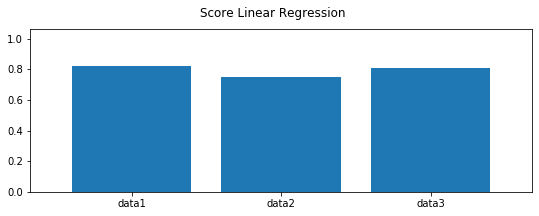

In [53]:
names = ['data1', 'data2', 'data3']
values = [liReg_score1, liReg_score2, liReg_score3]

plt.figure(figsize=(9, 3))

plt.margins(x=0.1, y=0.3)

plt.bar(names, values)

plt.suptitle('Score Linear Regression')
plt.show()

In conclusion, the best score with Linear Regression is: 0.8190563344758195

### Regression Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
regtree=DecisionTreeRegressor(min_samples_split=20,min_samples_leaf=10,random_state=42)

#### 1 - The first method is to do it manually with the Pearson method.

In [56]:
regtree.fit(X_train_1,y_train_1)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [57]:
preds=regtree.predict(X_test_1)

In [58]:
score_regresion_tree1= regtree.score(X_test_1,y_test_1)
print("Tree Regression Score :",score_regresion_tree1)

Tree Regression Score : 0.8201561801903696


#### 2 - The second is using tools from the sklearn library


In [59]:
regtree.fit(X_train_2,y_train_2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [60]:
preds=regtree.predict(X_test_2)

In [61]:
score_regresion_tree2= regtree.score(X_test_2,y_test_2)
print("Tree Regression Score :",score_regresion_tree2)

Tree Regression Score : 0.7674131368561831


#### 3 - Use all the predictor variables


In [62]:
regtree.fit(X_train_3,y_train_3)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [63]:
preds=regtree.predict(X_test_3)

In [64]:
score_regresion_tree3= regtree.score(X_test_3,y_test_3)
print("Tree Regression Score :",score_regresion_tree3)

Tree Regression Score : 0.8082453683778278


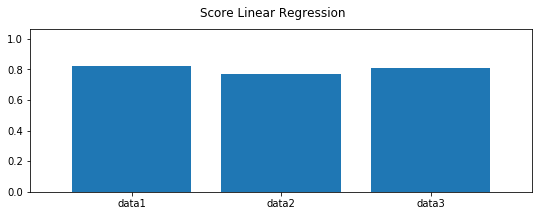

In [65]:
names = ['data1', 'data2', 'data3']
values = [score_regresion_tree1, score_regresion_tree2, score_regresion_tree3]

plt.figure(figsize=(9, 3))

plt.margins(x=0.1, y=0.3)

plt.bar(names, values)

plt.suptitle('Score Linear Regression')
plt.show()

In conclusion, the best score with Regression Tree is: 0.8201561801903696

### Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor

#### 1 - The first method is to do it manually with the Pearson method.

In [67]:
forest1= RandomForestRegressor(n_jobs=2,oob_score=True,n_estimators=250)

In [68]:
forest1.fit(X_train_1,y_train_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=2,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [69]:
preds=forest1.predict(X_test_1)

In [70]:
score_random_forest_regresion_1= forest1.score(X_test_1,y_test_1)
print("Tree Regression Score :",score_random_forest_regresion_1)

Tree Regression Score : 0.8894076213346147


#### 2 - The second is using tools from the sklearn library


In [71]:
forest2= RandomForestRegressor(n_jobs=2,oob_score=True,n_estimators=250)

In [72]:
forest2.fit(X_train_2,y_train_2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=2,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [73]:
preds=forest2.predict(X_test_2)

In [74]:
score_random_forest_regresion_2= forest2.score(X_test_2,y_test_2)
print("Tree Regression Score :",score_random_forest_regresion_2)

Tree Regression Score : 0.815553361054328


#### 3 - Use all the predictor variables


In [75]:
forest3= RandomForestRegressor(n_jobs=2,oob_score=True,n_estimators=250)

In [76]:
forest3.fit(X_train_3,y_train_3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=2,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [77]:
preds=forest3.predict(X_test_3)

In [78]:
score_random_forest_regresion_3= forest3.score(X_test_3,y_test_3)
print("Tree Regression Score :",score_random_forest_regresion_3)

Tree Regression Score : 0.8945768693580497


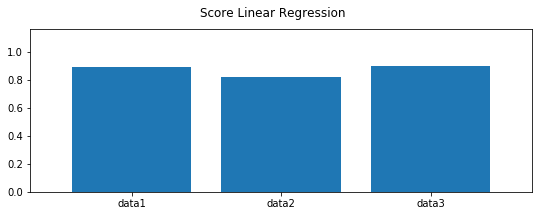

In [79]:
names = ['data1', 'data2', 'data3']
values = [score_random_forest_regresion_1, score_random_forest_regresion_2, score_random_forest_regresion_3]

plt.figure(figsize=(9, 3))

plt.margins(x=0.1, y=0.3)

plt.bar(names, values)

plt.suptitle('Score Linear Regression')
plt.show()

### Conclusion

I have observed that the model that has given a better prediction has been Random Forest and, in general, the set of predictor variables obtained from the Pearson method is the most optimal. It is the most optimal model because it uses fewer variables to have a prediction very similar to if we used all the predictor variables.

Model: Random Forest.

1 - The first method is to do it manually with the Pearson method.


Now I have everything ready to apply the model to the test dataset:

In [80]:
relevance_features=["OverallQual", "YearBuilt","YearRemodAdd","MasVnrArea","Foundation","BsmtFinType1","BsmtFinSF1",
                    "TotalBsmtSF","HeatingQC","GrLivArea","FullBath","Fireplaces","FireplaceQu"
                    ,"GarageCars"]  

In [81]:
X_test_data=test_data[relevance_features]

In [82]:
ids = test_data['Id']
predictions = forest1.predict(X_test_data)

In [83]:
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })

In [84]:
output.to_csv('submission.csv', index=False) 